## LIME IMPLEMENTATION

In [48]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
print('Notebook run using keras:', keras.__version__)
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from skimage.segmentation import mark_boundaries

%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) 
    import lime
from lime import lime_image

Notebook run using keras: 2.4.3
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the Pre-Trained ResNet50 Model

In [49]:
IMG_HEIGHT = 224  
IMG_WIDTH = 224  

f_restnet = ResNet50(weights='imagenet', input_shape=(224,224,3)) 


f_restnet.summary() 

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

## Preprocess the Input Image

In [50]:
def transform_img_fn(filename):
    out = []
    for img_path in filename:
        img = image.load_img(filename, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = tf.keras.applications.resnet.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [51]:
def class_name(class_label):
        return decode_predictions(np.eye(1, 1000, class_label))[0][0][1]

## LIME Explanation

In [52]:

def main(filepath, class_label):
    images = transform_img_fn(filepath)
    plt.imshow(images[0])
    preds = f_restnet.predict(images)
    for x in decode_predictions(preds)[0]:
        print(x)

    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(images[0].astype('double'), f_restnet.predict, top_labels=5, hide_color=0, num_samples=500)
    print (explanation.top_labels[0:5])
    
    
    # We can see the top 5 superpixels that are most positive towards the class with the rest of the image hidden
    print ("Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden")
    temp, mask = explanation.get_image_and_mask(class_label, positive_only=True, num_features=5, hide_rest=True)
    plt.imshow(mark_boundaries(temp, mask))
    plt.show()

    # We can see the top 5 superpixels that are most positive towards the class with the rest of the image present
    print ("Top 5 superpixels that are most positive towards the given Image with the rest of the image Present")
    temp, mask = explanation.get_image_and_mask(class_label, positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp, mask))
    plt.show()

    # We can also see the 'pros and cons' (pros in green, cons in red)
    plt.title('Explanation for `{}`'.format(class_name(class_label)))
    print ("Pros in Green and Cons in Red")
    temp, mask = explanation.get_image_and_mask(class_label, positive_only=False, num_features=10, hide_rest=False)
    plt.imshow(mark_boundaries(temp, mask))
    plt.show()

    
    # Alternatively, we can also plot explanation weights onto a heatmap visualization. The colorbar shows the values of the weights.
    #Select the same class explained on the figures above.
    print("A Heatmap Visualization")
    print ("Explanation weights for {} " .format(class_name(class_label)))
    ind =  class_label

    #Map each explanation weight to the corresponding superpixel
    dict_heatmap = dict(explanation.local_exp[ind])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

    #Plot. The visualization makes more sense if a symmetrical colorbar is used.
    plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    plt.colorbar()



## Image 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n01582220', 'magpie', 0.9883378)
('n01795545', 'black_grouse', 0.0056231357)
('n01601694', 'water_ouzel', 0.0028173642)
('n02037110', 'oystercatcher', 0.00060071127)
('n01798484', 'prairie_chicken', 0.00045846598)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18, 80, 20, 143, 83]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


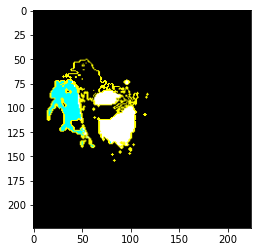

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


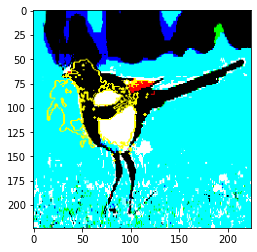

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pros in Green and Cons in Red


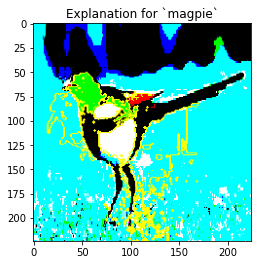

A Heatmap Visualization
Explanation weights for magpie 
Wall time: 1min 13s


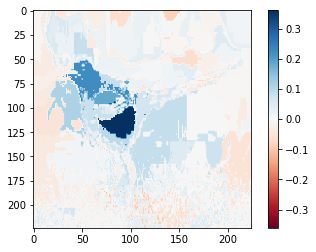

In [53]:
%%time
main('C:/Users/BM/Desktop/LIME&RISE/magpie.jfif', 18)

## Image 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n03125729', 'cradle', 0.537463)
('n02804414', 'bassinet', 0.45932558)
('n03131574', 'crib', 0.0030452039)
('n04204238', 'shopping_basket', 6.713132e-05)
('n03482405', 'hamper', 5.9513346e-05)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[516, 431, 520, 790, 588]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


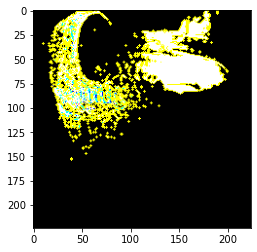

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


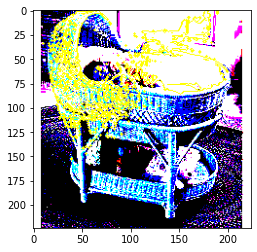

Pros in Green and Cons in Red


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


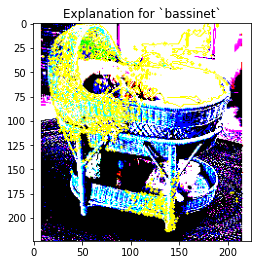

A Heatmap Visualization
Explanation weights for bassinet 


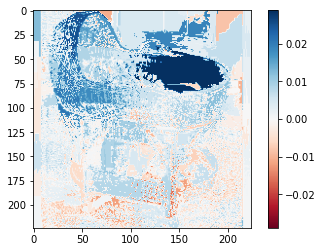

In [34]:
main('C:/Users/BM/Desktop/LIME&RISE/bassinet.jfif', 431)

## Image 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n02843684', 'birdhouse', 0.9994824)
('n03710193', 'mailbox', 0.00021787937)
('n04258138', 'solar_dish', 4.749123e-05)
('n03930313', 'picket_fence', 3.7312326e-05)
('n03976657', 'pole', 3.016217e-05)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[448, 637, 807, 716, 733]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


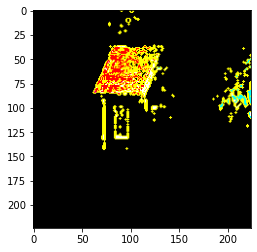

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


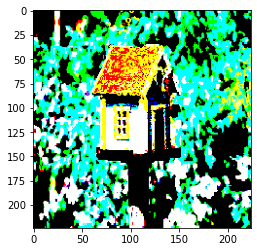

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pros in Green and Cons in Red


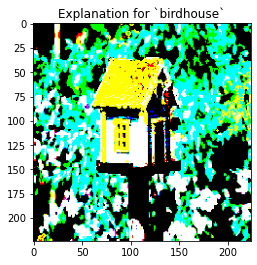

A Heatmap Visualization
Explanation weights for birdhouse 


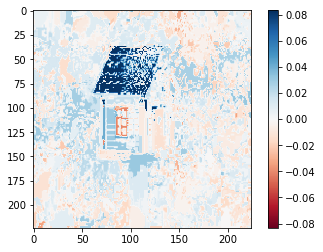

In [35]:
main('C:/Users/BM/Desktop/LIME&RISE/birdhouse.jfif', 448)

## Image 4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n02106166', 'Border_collie', 0.3067411)
('n02090622', 'borzoi', 0.29023638)
('n02105056', 'groenendael', 0.22047447)
('n02106030', 'collie', 0.14271276)
('n02091831', 'Saluki', 0.0076549184)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[232, 169, 224, 231, 176]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


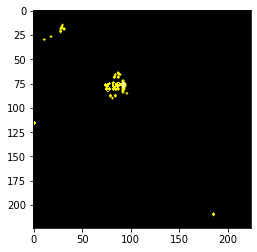

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


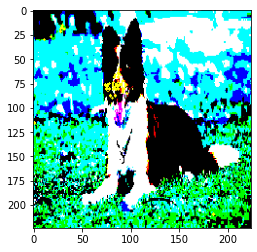

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pros in Green and Cons in Red


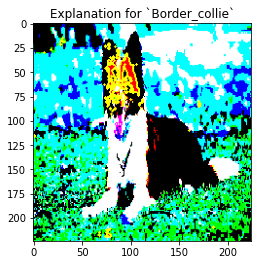

A Heatmap Visualization
Explanation weights for Border_collie 


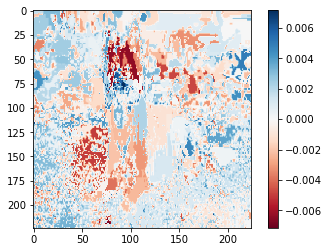

In [36]:
main('C:/Users/BM/Desktop/LIME&RISE/bordercollie.jfif', 232)

## Image 5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n02099429', 'curly-coated_retriever', 0.7350131)
('n02102973', 'Irish_water_spaniel', 0.14566404)
('n02099849', 'Chesapeake_Bay_retriever', 0.081785575)
('n02100877', 'Irish_setter', 0.012921169)
('n02102480', 'Sussex_spaniel', 0.008970699)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[206, 221, 209, 213, 220]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


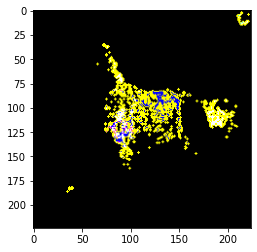

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


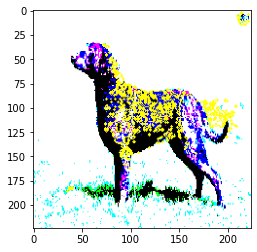

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pros in Green and Cons in Red


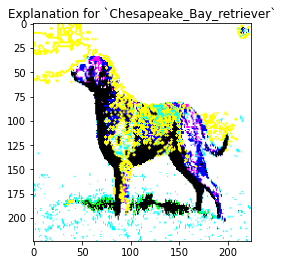

A Heatmap Visualization
Explanation weights for Chesapeake_Bay_retriever 


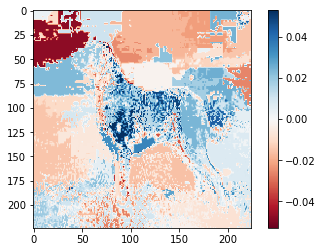

In [37]:
main('C:/Users/BM/Desktop/LIME&RISE/ChesapeakeBayretriever.jfif', 209)

## Image 6

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n03045698', 'cloak', 0.99975127)
('n02667093', 'abaya', 0.00020772833)
('n03866082', 'overskirt', 3.1110983e-05)
('n03450230', 'gown', 2.3227246e-06)
('n04532106', 'vestment', 1.8028433e-06)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[501, 399, 689, 578, 887]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


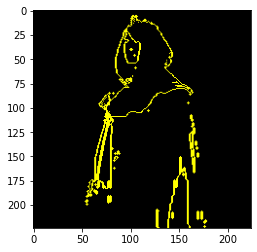

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


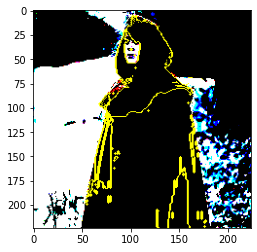

Pros in Green and Cons in Red


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


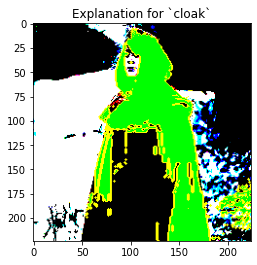

A Heatmap Visualization
Explanation weights for cloak 


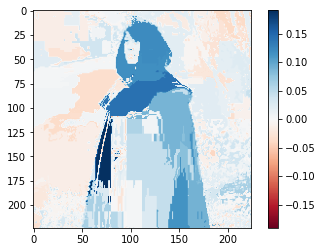

In [38]:
main('C:/Users/BM/Desktop/LIME&RISE/cloak.jfif', 501)

## Image 7

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n03617480', 'kimono', 0.99978787)
('n04532106', 'vestment', 0.00012838887)
('n03877472', 'pajama', 5.1089588e-05)
('n02667093', 'abaya', 2.3956789e-05)
('n02669723', 'academic_gown', 1.9889467e-06)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[614, 887, 697, 399, 400]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


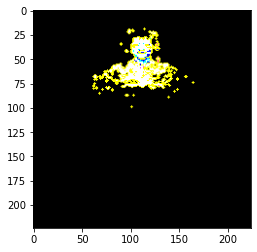

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


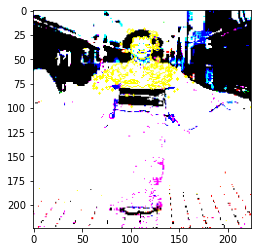

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pros in Green and Cons in Red


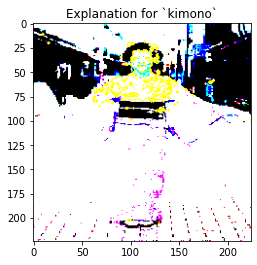

A Heatmap Visualization
Explanation weights for kimono 


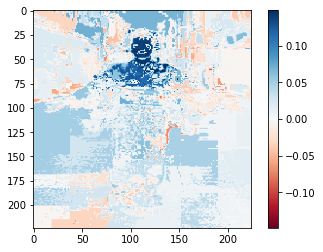

In [39]:
main('C:/Users/BM/Desktop/LIME&RISE/kimono.jfif', 614)

## Image 8

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n03877845', 'palace', 0.9882869)
('n03781244', 'monastery', 0.0065847724)
('n04005630', 'prison', 0.0036503063)
('n04523525', 'vault', 0.000996276)
('n02980441', 'castle', 0.00017099384)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[698, 663, 743, 884, 483]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


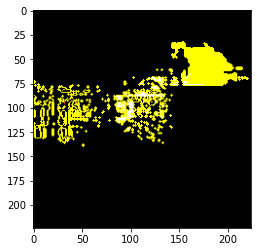

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


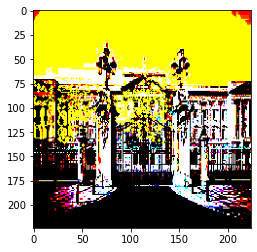

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pros in Green and Cons in Red


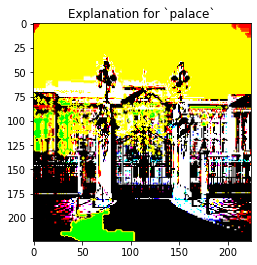

A Heatmap Visualization
Explanation weights for palace 


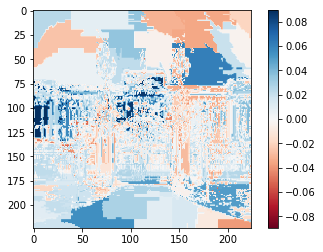

In [40]:
main('C:/Users/BM/Desktop/LIME&RISE/palace.jfif', 698)

## Image 9

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n01806143', 'peacock', 0.99824333)
('n02319095', 'sea_urchin', 0.0012749808)
('n09256479', 'coral_reef', 0.0001121298)
('n01914609', 'sea_anemone', 0.000104136896)
('n04033901', 'quill', 0.000100389305)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[84, 328, 973, 108, 749]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


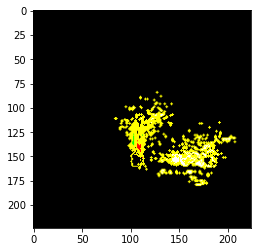

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


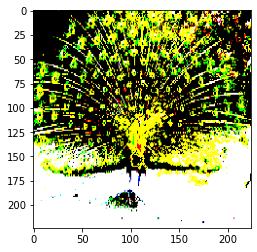

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pros in Green and Cons in Red


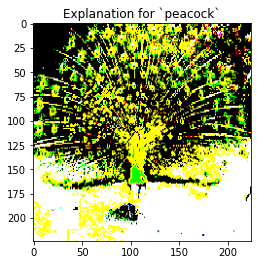

A Heatmap Visualization
Explanation weights for peacock 


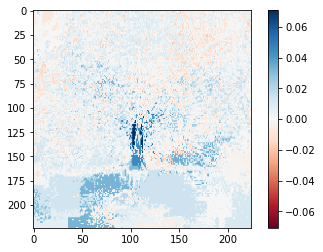

In [41]:
main('C:/Users/BM/Desktop/LIME&RISE/peacock.jfif', 84)

## Image 10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n04090263', 'rifle', 0.92484903)
('n02749479', 'assault_rifle', 0.074844114)
('n04086273', 'revolver', 0.0002767965)
('n04536866', 'violin', 1.3146464e-05)
('n02879718', 'bow', 1.1639038e-05)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[764, 413, 763, 889, 456]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


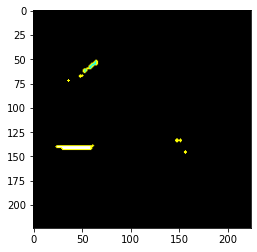

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


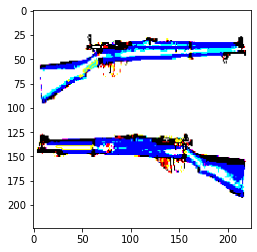

Pros in Green and Cons in Red


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


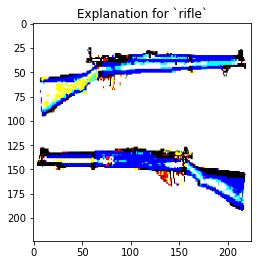

A Heatmap Visualization
Explanation weights for rifle 


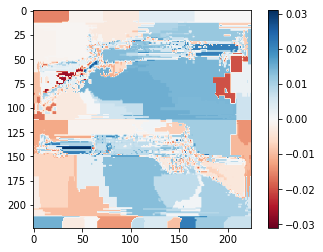

In [42]:
main('C:/Users/BM/Desktop/LIME&RISE/rifle.jfif', 764)

## Image 11

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n04285008', 'sports_car', 0.58094263)
('n04037443', 'racer', 0.41073394)
('n02974003', 'car_wheel', 0.0039789844)
('n03930630', 'pickup', 0.0021206075)
('n03100240', 'convertible', 0.00090661936)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[817, 751, 479, 717, 511]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


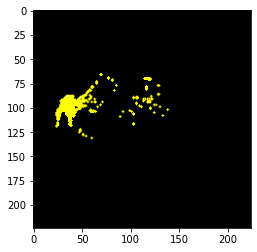

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


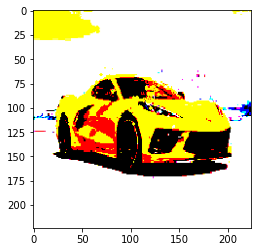

Pros in Green and Cons in Red


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


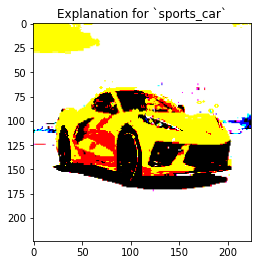

A Heatmap Visualization
Explanation weights for sports_car 


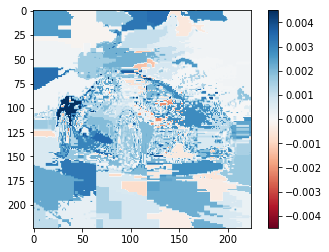

In [43]:
main('C:/Users/BM/Desktop/LIME&RISE/sportscar.jfif', 817)

## Image 12

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n01498041', 'stingray', 0.6115181)
('n01496331', 'electric_ray', 0.38815704)
('n02074367', 'dugong', 0.00014269621)
('n01491361', 'tiger_shark', 4.425555e-05)
('n02066245', 'grey_whale', 2.0837842e-05)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6, 5, 149, 3, 147]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


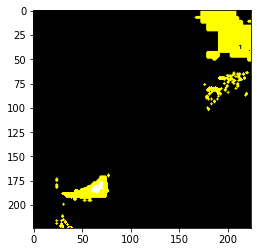

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


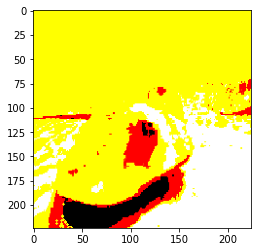

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pros in Green and Cons in Red


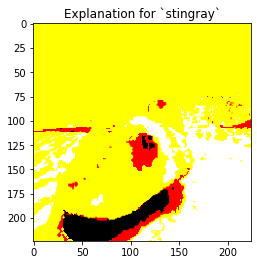

A Heatmap Visualization
Explanation weights for stingray 


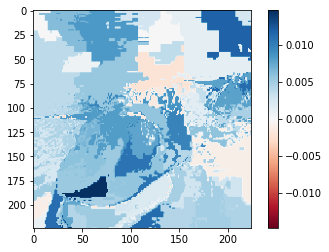

In [44]:
main('C:/Users/BM/Desktop/LIME&RISE/stingray.jfif', 6)

## Image 13

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n01774750', 'tarantula', 0.9728072)
('n01773549', 'barn_spider', 0.020396873)
('n01776313', 'tick', 0.0021363564)
('n01980166', 'fiddler_crab', 0.0010445734)
('n01773797', 'garden_spider', 0.00062608026)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[76, 73, 78, 120, 74]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


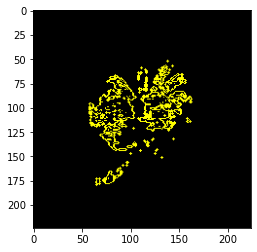

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


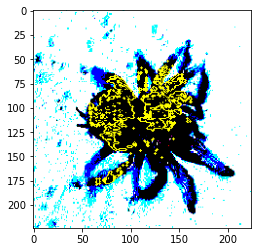

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pros in Green and Cons in Red


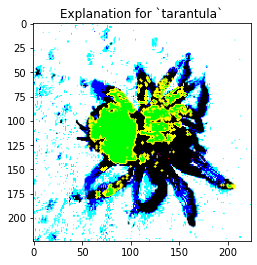

A Heatmap Visualization
Explanation weights for tarantula 


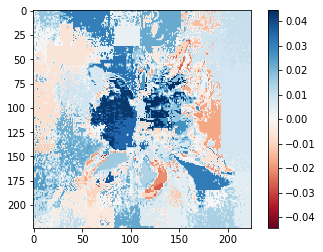

In [45]:
main('C:/Users/BM/Desktop/LIME&RISE/tarantula.jfif', 76)

## Image 14

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n01843383', 'toucan', 0.97728854)
('n01829413', 'hornbill', 0.014705787)
('n01798484', 'prairie_chicken', 0.0013915068)
('n01807496', 'partridge', 0.0012139196)
('n02017213', 'European_gallinule', 0.0009542222)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[96, 93, 83, 86, 136]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


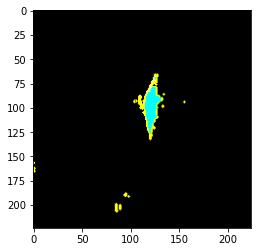

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


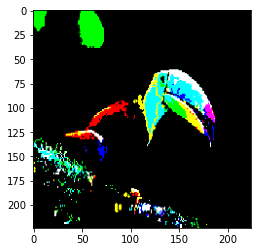

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pros in Green and Cons in Red


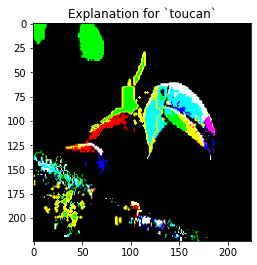

A Heatmap Visualization
Explanation weights for toucan 


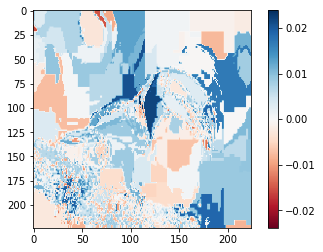

In [46]:
main('C:/Users/BM/Desktop/LIME&RISE/toucan.jfif', 96)

## Image 15

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('n04442312', 'toaster', 0.9999999)
('n04372370', 'switch', 2.9863244e-08)
('n03666591', 'lighter', 2.5326726e-08)
('n03908714', 'pencil_sharpener', 1.6455287e-08)
('n04041544', 'radio', 1.3152221e-08)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[859, 844, 626, 710, 754]
Top 5 superpixels that are most positive towards the given Image with the rest of the image Hidden


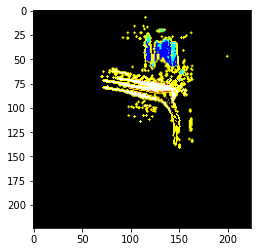

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 5 superpixels that are most positive towards the given Image with the rest of the image Present


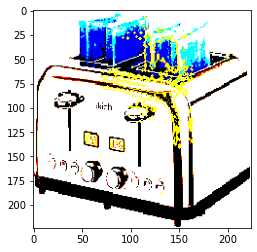

Pros in Green and Cons in Red

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


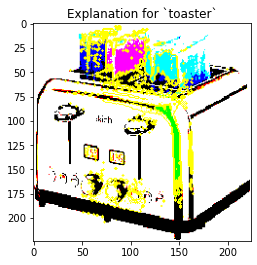

A Heatmap Visualization
Explanation weights for toaster 


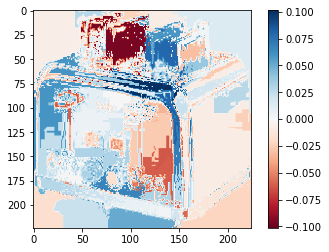

In [47]:
main('C:/Users/BM/Desktop/LIME&RISE/toaster.jfif', 859)